This notebook tries to understand the relationship between hyperplane found by logistic regression and PCA principal components.

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import matplotlib as mlp
mlp.rcParams['figure.figsize'] = (8, 4.5)
# mlp.style.use('classic')
import matplotlib.pyplot as plt
# %matplotlib inline

In [2]:
# turn this into notebook for interacting with 3D plots
# %matplotlib inline
%matplotlib notebook

# 2-D example

In [3]:
c1 = np.array([5, 0])
c2 = np.array([-5, 0])
centers = np.vstack((c1, c2))

dataset, labels = make_blobs(n_samples=100, centers=centers)
dataset = StandardScaler().fit_transform(dataset)
dataset.var(axis=0)

array([ 1.,  1.])

In [4]:
clf = LogisticRegression(tol=1e-10)

In [5]:
clf.fit(dataset, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=1e-10,
          verbose=0, warm_start=False)

In [6]:
coefs = clf.coef_[0]

# Sample points from the decision boundary

In [7]:
db_xs = np.linspace(-2, 2, 10)
db_ys = (-clf.intercept_ - coefs[0] * db_xs) / coefs[1]
hyperplane = np.array([db_xs, db_ys]).T

In [8]:
pca = PCA(n_components=1)
pca.fit(dataset)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

## Construct the first component

In [9]:
pc_xs = db_xs
comp1 = pca.components_[0]
pc_ys = comp1[0] * pc_xs / comp1[1]

# Transform and inverse transform both dataset and hyperplane

In [10]:
reduced_dataset = pca.transform(dataset)
inverse_dataset = pca.inverse_transform(reduced_dataset)

In [11]:
reduced_hp = pca.transform(hyperplane)
inverse_hp = pca.inverse_transform(reduced_hp)

<IPython.core.display.Javascript object>


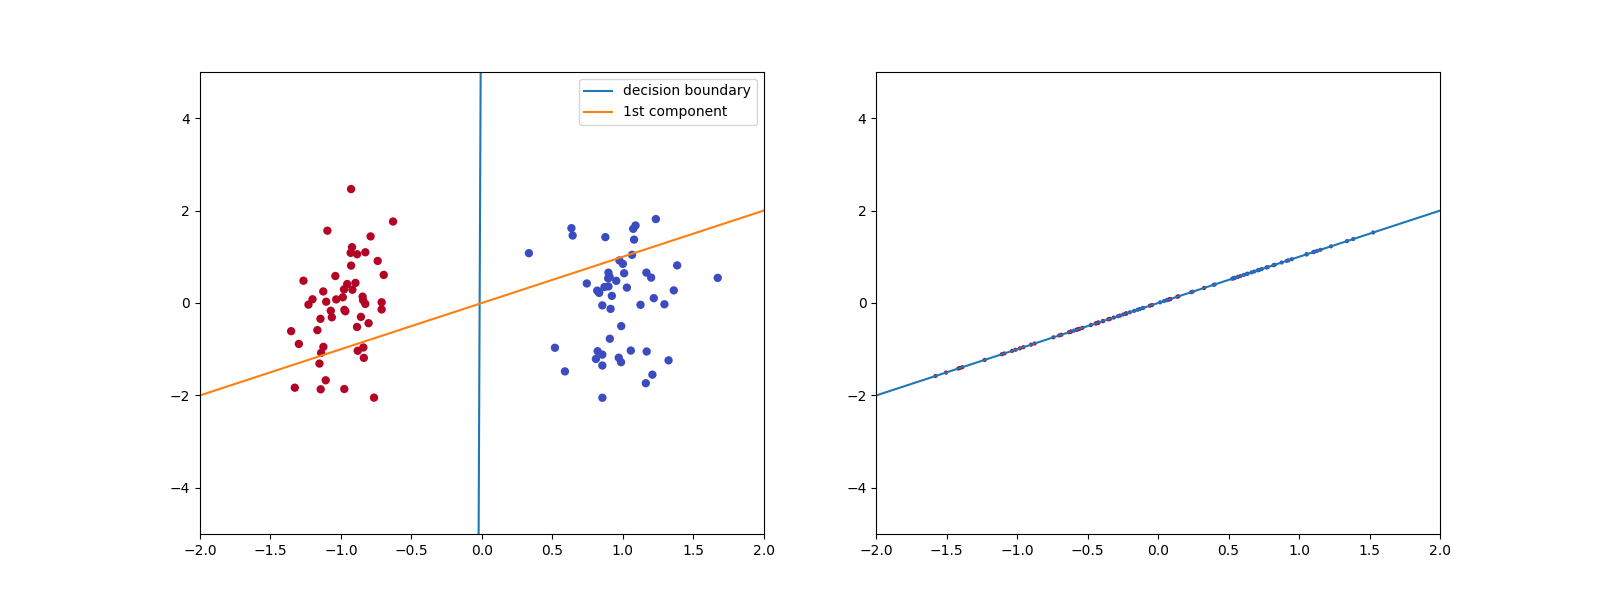

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
ax1, ax2 = axes

ax1.scatter(dataset[:, 0], dataset[:, 1], c=labels, edgecolors='none', cmap='coolwarm')
ax1.plot(db_xs, db_ys, label='decision boundary')
ax1.plot(pc_xs, pc_ys, label='1st component')
ax1.legend(loc='best')


ax2.scatter(inverse_dataset[:, 0], inverse_dataset[:, 1], c=labels, marker='.', edgecolor='none', cmap='coolwarm')
ax2.plot(inverse_hp[:,0], inverse_hp[:,1])

for ax in [ax1, ax2]:
    ax.set_xlim([-2, 2])
    ax.set_ylim([-5, 5])

So in this 2-D example, unless the hyperplane is orthogonal to the first principal component, then when projected, it will overlap with all datapoints. 

# Explore 3-D example

In [13]:
from mpl_toolkits.mplot3d import Axes3D

In [14]:
c1 = np.array([0, 0, 5])
c2 = np.array([0, 5, 0])
centers = np.vstack((c1, c2))

In [15]:
dataset, labels = make_blobs(n_samples=100, n_features=3, centers=centers)

In [16]:
dataset = StandardScaler().fit_transform(dataset)
dataset.var(axis=0)

array([ 1.,  1.,  1.])

In [17]:
clf = LogisticRegression(tol=1e-10)

In [18]:
clf.fit(dataset, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=1e-10,
          verbose=0, warm_start=False)

In [19]:
coefs = clf.coef_[0]

# Sample points from the decision boundary

In [20]:
# prepare for drawing plane, points have to be evenly distributed to have a uniform texture
_db_xs = np.linspace(-2, 2, 10)
_db_ys = np.linspace(-2, 2, 10)
db_xxs, db_yys = np.meshgrid(_db_xs, _db_ys)
db_zzs = (- clf.intercept_ - db_xxs * coefs[0] - db_yys * coefs[1]) / coefs[2]

In [21]:
# randomly sample points from the hyperplane
db_xs = (np.random.rand(10) - 0.5) * 4
db_ys = (np.random.rand(10) - 0.5) * 4
db_zs = (- clf.intercept_ - db_xs * coefs[0] - db_ys * coefs[1]) / coefs[2]
hyperplane = np.array([db_xs, db_ys, db_zs]).T

In [22]:
pca = PCA(n_components=2)
pca.fit(dataset)
comp1, comp2 = pca.components_

## Construct the first component

In [23]:
xlim, ylim, zlim = np.array([dataset.min(axis=0), dataset.max(axis=0)]).T

In [24]:
%matplotlib notebook

<IPython.core.display.Javascript object>


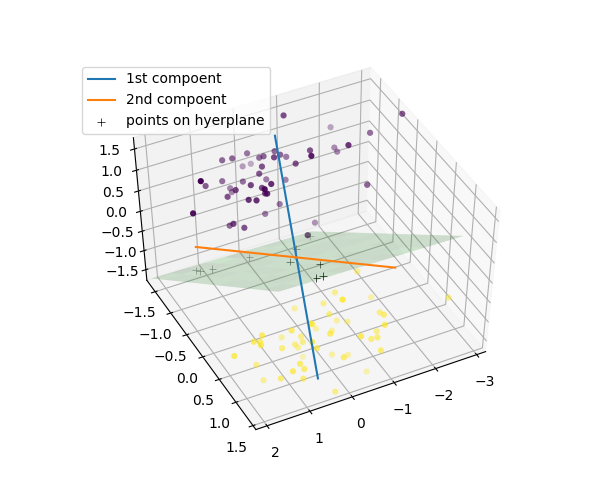

In [25]:
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dataset[:,0], dataset[:,1], dataset[:,2], c=labels, edgecolor='none', marker='o')
ax.scatter(hyperplane[:,0], hyperplane[:,1], hyperplane[:,2], c='black', edgecolor='none', s=30, lw=0.5, marker='+',
           label='points on hyerplane')

ax.plot(*np.array([-2 * comp1, 2 * comp1]).T, label='1st compoent')
ax.plot(*np.array([-2 * comp2, 2 * comp2]).T, label='2nd compoent')

ax.plot_surface(db_xxs, db_yys, db_zzs, alpha=0.2)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_zlim(zlim)
ax.legend(loc='upper left')

# Transform and inverse transform both dataset and hyperplane

In [26]:
reduced_dataset = pca.transform(dataset)
inverse_dataset = pca.inverse_transform(reduced_dataset)

In [27]:
print(reduced_dataset.shape, inverse_dataset.shape)

(100, 2) (100, 3)


<IPython.core.display.Javascript object>


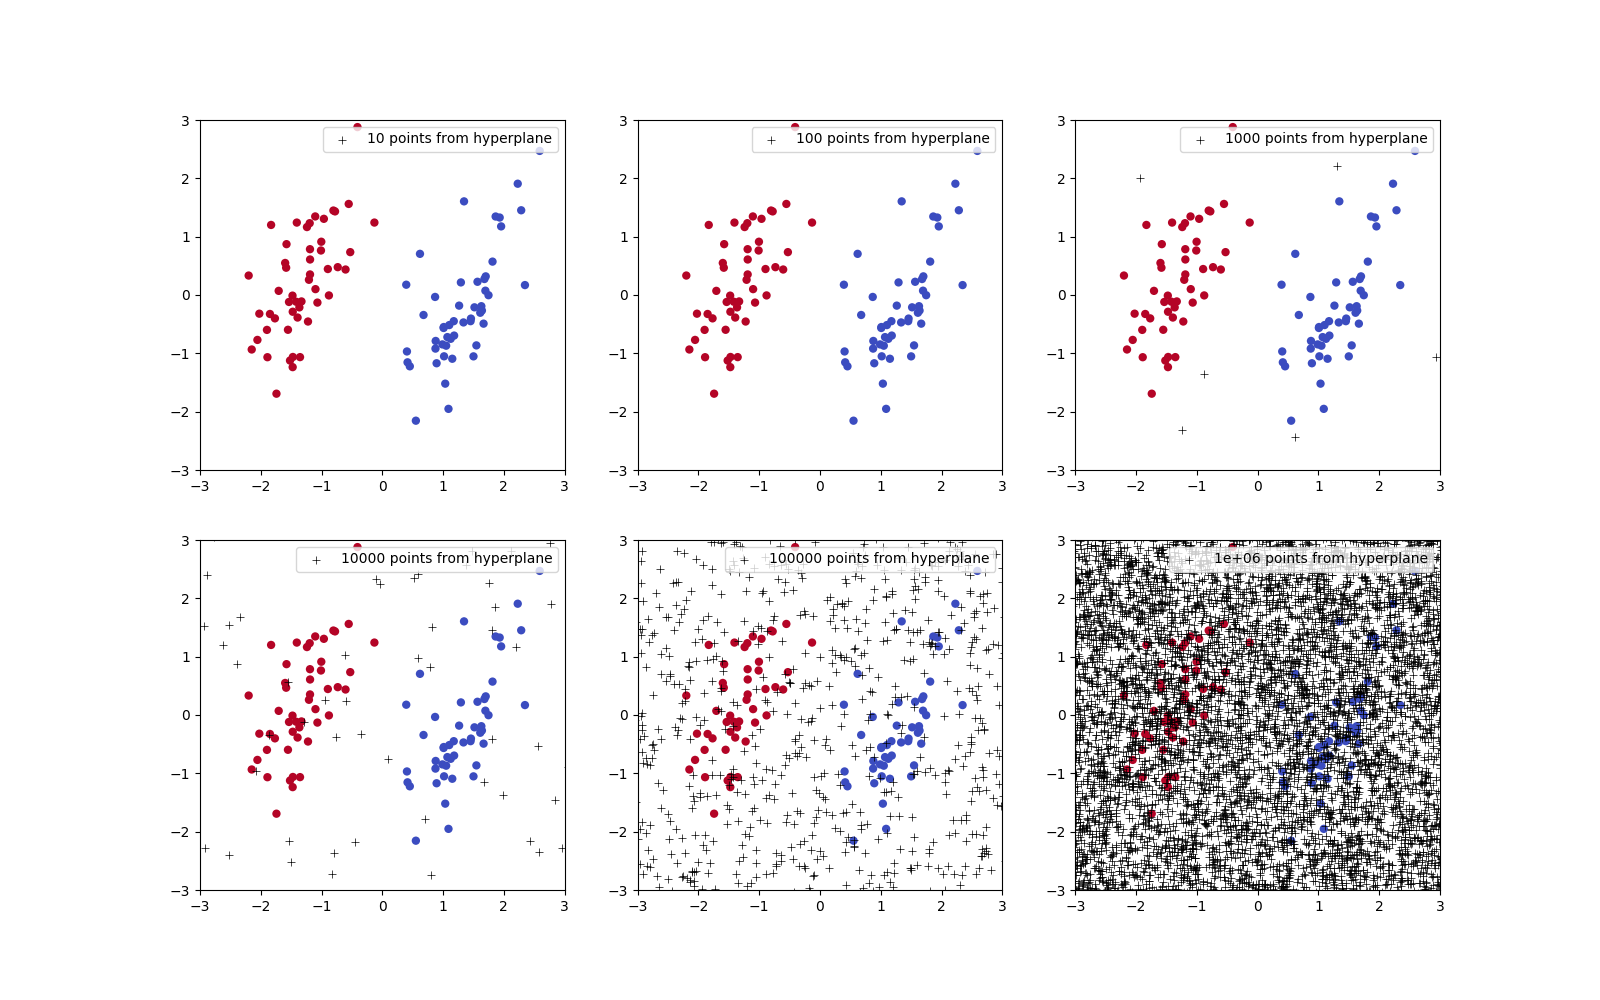

0,1,2,3,4,5,

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for k, i in enumerate(range(1, 7)):
    print(k, end=',')
    # randomly sample different numbers of points and see their projection
    num = int(10 ** i)
    db_xs = (np.random.rand(num) - 0.5) * 500
    db_ys = (np.random.rand(num) - 0.5) * 500
    db_zs = (- clf.intercept_ - db_xs * coefs[0] - db_ys * coefs[1]) / coefs[2]
    hyperplane = np.array([db_xs, db_ys, db_zs]).T

    reduced_hp = pca.transform(hyperplane)
    inverse_hp = pca.inverse_transform(reduced_hp)

    ax = axes[k]
    ax.scatter(reduced_dataset[:, 0], reduced_dataset[:, 1], c=labels, edgecolors='none', cmap='coolwarm')
    ax.scatter(reduced_hp[:,0], reduced_hp[:,1], color='black', s=30, marker='+', lw=0.5,
               label='{0:g} points from hyperplane'.format(num))
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    
    ax.legend(loc='upper right')

So if the principal component is not orthogonal to the hyperplane, then it will pretty much be everywhere after projection